For various configurations, compute and plot hydro coefficients for high, finite m0 
and infinite m0. The expected behavior is that hydro coefficients converge as m0 increases,
and confirms the accuracy of the m0 = inf implementation.
Damping is set to zero in the code (the imaginary part computes to 0, but typical hydro coefficient computation involves multiplying by omega = inf, leading to errors. But it should be zero).

In [1]:
import matplotlib.pyplot as plt
from numpy import inf
from multi_condensed import Problem

In [2]:
m0s = [1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 1e6]
rho = 1023

# note that m0 * h > 1e8 leads to breakdown of the m_k solver


In [3]:
def plot_log_x_with_hline(x, y, v, coeff):
    plt.figure()

    # Plot y vs x on a log-x axis
    plt.semilogx(x, y, label=coeff, marker='o')

    # Add horizontal reference line at y = v
    plt.axhline(y=v, color='orange', linestyle='--', label='m0 = inf')

    # Labeling
    plt.xlabel("m0")
    plt.ylabel(coeff)
    plt.title(f"{coeff} at increasing wavenumbers")
    plt.legend()
    plt.grid(True, which="both", linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.show()

def plot_am_dp(m0s, ams, dps, inf_am, inf_dp):
    plot_log_x_with_hline(m0s, ams, inf_am, "Added Mass")
    plot_log_x_with_hline(m0s, dps, inf_dp, "Damping")

def solve_MEEM(h, d, a, heaving, m0, rho):
    NMK = [100] * (len(heaving) + 1)
    prob = Problem(h, d, a, heaving, NMK, m0, rho)
    a_matrix = prob.a_matrix()
    b_vector = prob.b_vector()
    x = prob.get_unknown_coeffs(a_matrix, b_vector)
    am, dp = prob.hydro_coeffs(x, "umerc")
    return am, dp

def solve_for_all_m0s(h, d, a, heaving, m0s, rho):
    ams = []
    dps = []
    for m0 in m0s:
        am, dp = solve_MEEM(h, d, a, heaving, m0, rho)
        ams.append(am)
        dps.append(dp)
    inf_am, inf_dp = solve_MEEM(h, d, a, heaving, inf, rho)
    return ams, dps, inf_am, inf_dp

def solve_and_plot(h, d, a, heaving, m0s, rho):
    ams, dps, inf_am, inf_dp = solve_for_all_m0s(h, d, a, heaving, m0s, rho)
    plot_am_dp(m0s, ams, dps, inf_am, inf_dp)


/Users/Bimali/Desktop/SEALab/semi-analytical-hydro/hydro/python/multi_condensed.py:551: LinAlgWarning: Ill-conditioned matrix (rcond=5.00553e-94): result may not be accurate.
  return linalg.solve(a,b)


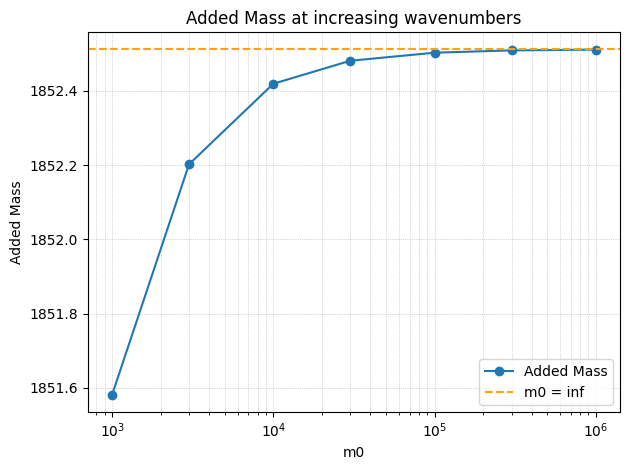

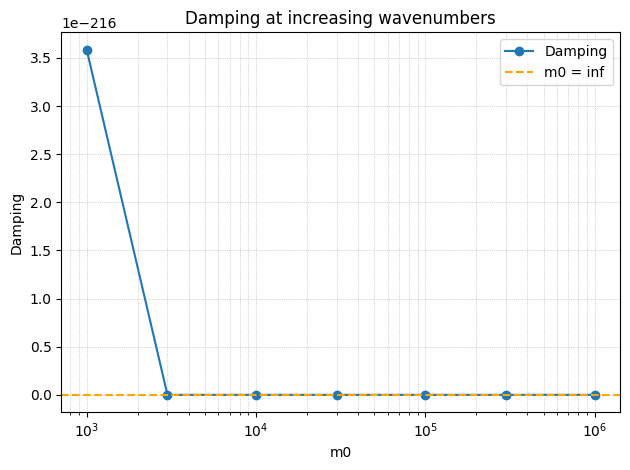

In [4]:
# config0 
h = 1.001
d = [0.5, 0.25]
a = [0.5, 1]
heaving = [1, 1]
solve_and_plot(h, d, a, heaving, m0s, rho)

/Users/Bimali/Desktop/SEALab/semi-analytical-hydro/hydro/python/multi_condensed.py:551: LinAlgWarning: Ill-conditioned matrix (rcond=2.52058e-94): result may not be accurate.
  return linalg.solve(a,b)


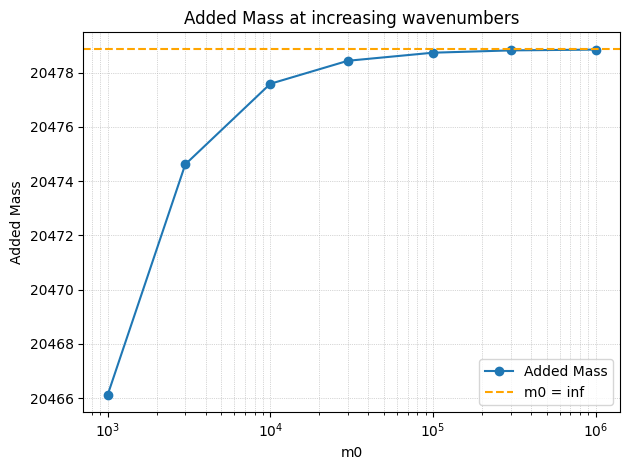

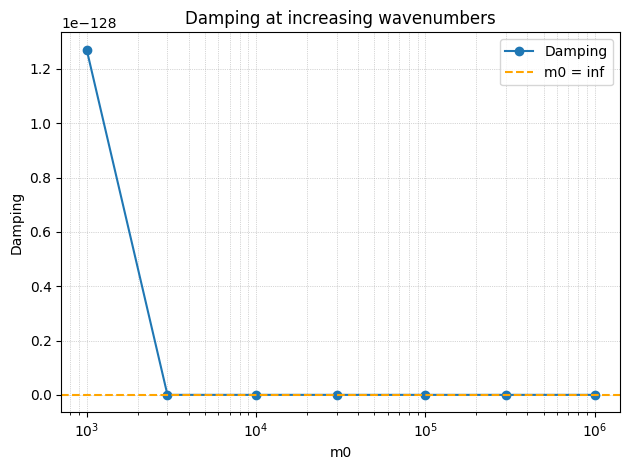

In [5]:
# config1
h = 1.5
d = [1.1, 0.85, 0.75, 0.4, 0.15]
a = [0.3, 0.5, 1, 1.2, 1.6]
heaving = [1, 1, 1, 1, 1]
solve_and_plot(h, d, a, heaving, m0s, rho)

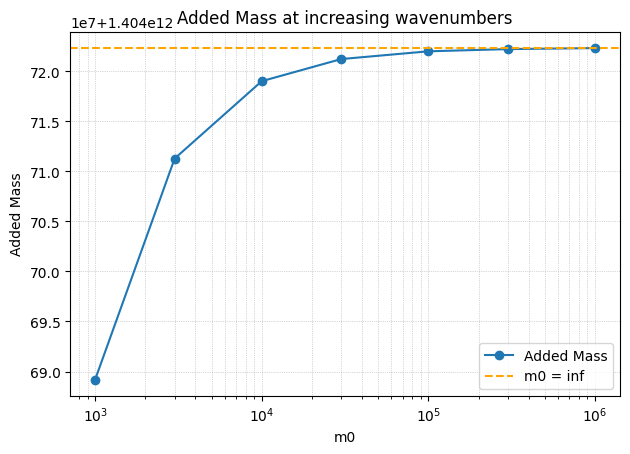

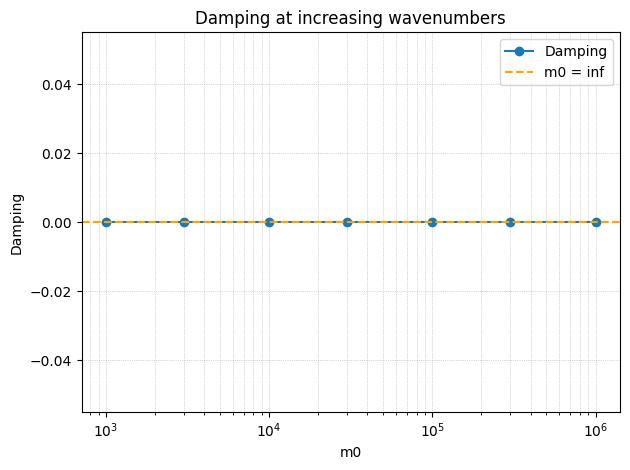

In [6]:
# config2
h = 100
d = [29, 7, 4]
a = [3, 5, 10]
heaving = [1, 1, 1]
solve_and_plot(h, d, a, heaving, m0s, rho)

/Users/Bimali/Desktop/SEALab/semi-analytical-hydro/hydro/python/multi_condensed.py:551: LinAlgWarning: Ill-conditioned matrix (rcond=3.23334e-65): result may not be accurate.
  return linalg.solve(a,b)


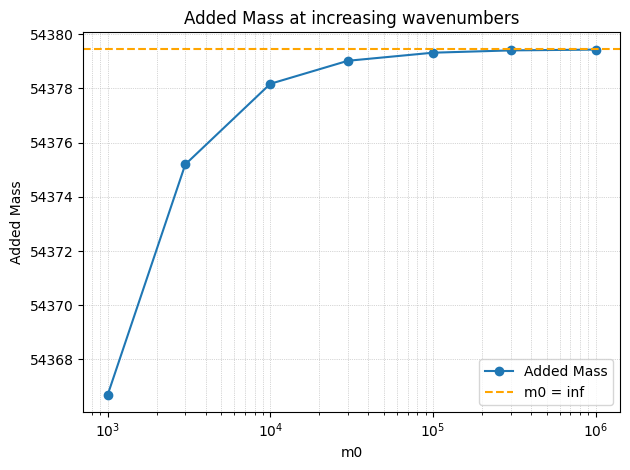

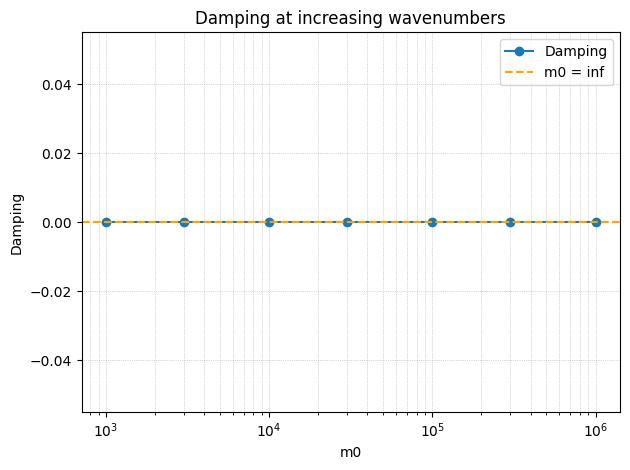

In [7]:
# config3
h = 1.9
d = [0.5, 0.7, 0.8, 0.2, 0.5]
a = [0.3, 0.5, 1, 1.2, 1.6]
heaving = [1, 1, 1, 1, 1]
solve_and_plot(h, d, a, heaving, m0s, rho)

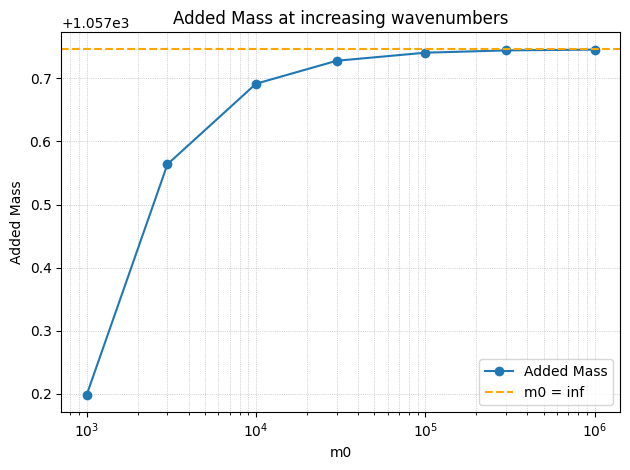

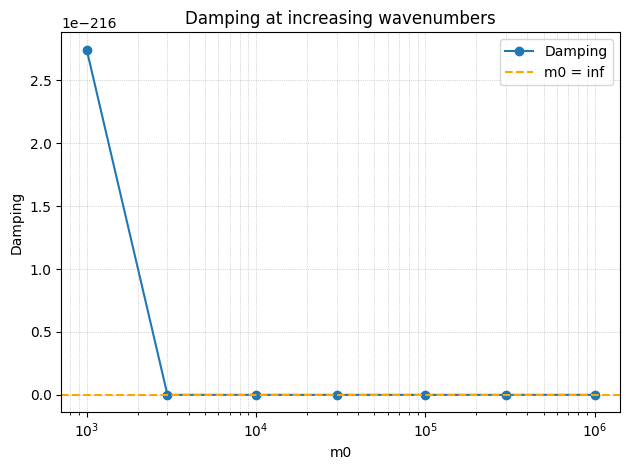

In [8]:
# config4 
h = 1.001
d = [0.5, 0.25]
a = [0.5, 1]
heaving = [0, 1]
solve_and_plot(h, d, a, heaving, m0s, rho)

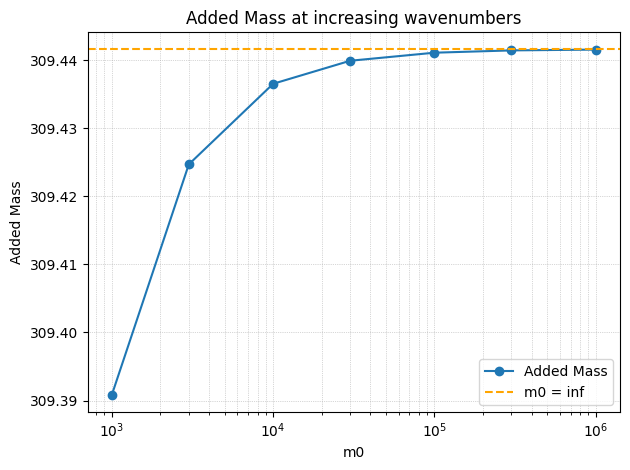

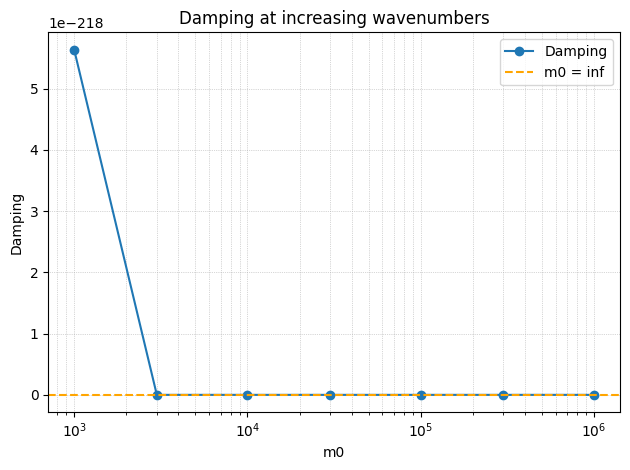

In [9]:
# config5
h = 1.001
d = [0.5, 0.25]
a = [0.5, 1]
heaving = [1, 0]
solve_and_plot(h, d, a, heaving, m0s, rho)

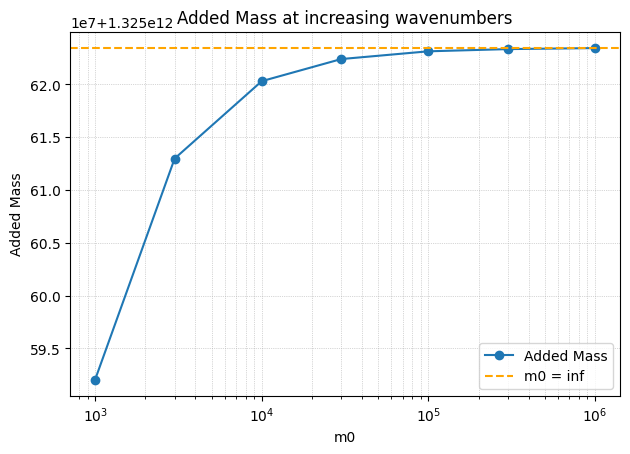

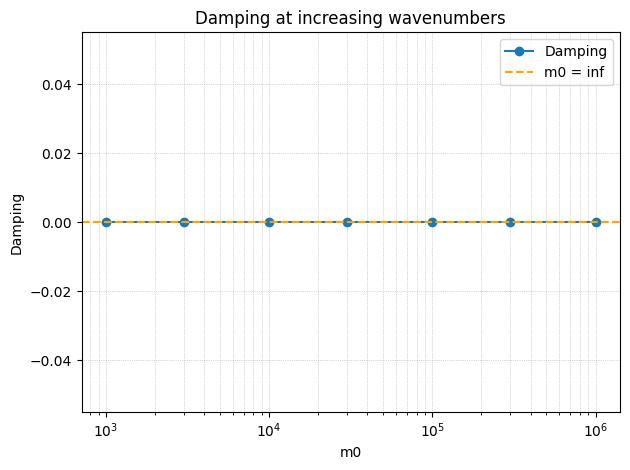

In [10]:
# config6
h = 100
d = [29, 7, 4]
a = [3, 5, 10]
heaving = [0, 1, 1]
solve_and_plot(h, d, a, heaving, m0s, rho)